# Relaxation Methods for Partial Diﬀerential Equations
## Advanced topics

* Author: Chu Lun Chen

Last updated on 12/6/2021

## Tasks: Overrelaxation

We can use the following update
$$
  V^{n+1}_{i,j} = \omega V^n_{AVG} + (1-\omega)V^n_{i,j},
$$
where $V_{AVG}$ is a shorthand for the average nearest-neighbor potential and the parameter $0<\omega<2$ is known as the **overrelazation parameter**.
* $\omega<1 \rightarrow$ **underrelaxation**.
* $\omega>1 \rightarrow$ **overrelaxation**.
* $\omega=1 \rightarrow$ standard update.

Modify your code for a single rectanglualr bounary and identify the best $\omega$ for this problem.

[[1.00000000e+02 1.00000000e+02 1.00000000e+02 ... 1.00000000e+02
  1.00000000e+02 1.00000000e+02]
 [0.00000000e+00 2.42847925e-01 9.76603567e-01 ... 5.95574369e-01
  8.28043924e-01 0.00000000e+00]
 [0.00000000e+00 1.53312642e-01 1.40056624e-01 ... 1.59730055e-01
  9.55690021e-01 0.00000000e+00]
 ...
 [0.00000000e+00 6.63829633e-01 5.73351605e-02 ... 2.93915357e-01
  4.88262003e-01 0.00000000e+00]
 [0.00000000e+00 9.73047438e-01 3.38861720e-01 ... 5.62602601e-01
  6.34608537e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


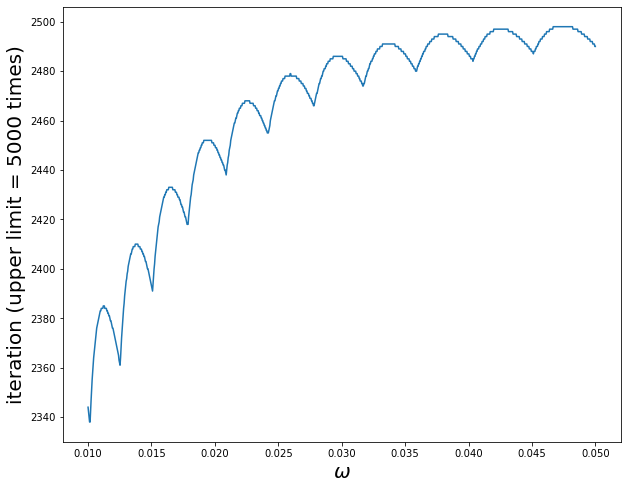

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def create_V(num):
    V = np.random.rand(num,num)
    V[num-1,:] = 0
    V[:,0] = 0
    V[:,num-1] = 0
    V[0,:] = 100
    print(V)
    return V

def iterate_V(V, delta, w):
    num = len(V)
    count = 0
    while True:
        count += 1
        Vi = np.array(V)
        V_average = np.array(V)
        V_average[1:num-1,1:num-1] = 0.25*(V[1:num-1,0:num-2]+V[1:num-1,2:num]+V[0:num-2,1:num-1]+V[2:num,1:num-1])
        V = w*V_average + (1 - w)*V
        Vf = np.array(V)
        if converge_V(Vi, Vf, delta) or count >= 5000:
            break
    return V, count

def plot_V(V):
    num = len(V)
    fig, ax = plt.subplots(figsize = (10,8))
    x = np.linspace(0,10,num)
    y = np.linspace(0,10,num)
    X, Y = np.meshgrid(x,y)
    ax.contour(X,Y,V)
    ax.contourf(X,Y,V)

def converge_V(Vi, Vf, delta):
    converge = np.full(Vi.shape, False)
    Vi_zero = Vi == 0
    Vf_zero = Vf == 0
    zero = Vi_zero|Vf_zero
    converge[zero] = Vi_zero[zero]&Vf_zero[zero]
    converge[~zero] = abs((Vf[~zero]-Vi[~zero])/Vi[~zero]) <= delta
    return converge.all()

num = 60
delta = 0.001
ws = np.linspace(0.01, 0.05, 1000)
V = create_V(num)
counts = []
for w in ws:
    Vf, count = iterate_V(V, delta, w)
    counts.append(count)
#plot_V(Vf)
fig, ax = plt.subplots(figsize = (10,8))
ax.plot(ws, counts)
ax.set_xlabel('$\\omega$', fontsize = 20)
ax.set_ylabel('iteration (upper limit = 5000 times)', fontsize = 20)
plt.savefig('P2.pdf')

## Tasks: Multigrid methods


Consider a squre boundary. 
* Starting with $2^0+1$ points (including the boundary point) in each direction. 
* Iterate a copule of times then perform the **prologation** from the coarse grid $(2^0+1)$ to the find grid $(2^1+1)$.
* Repeat the same procedue until you reach the finest grid with $2^N+1$ points, where $N$ is assinged by you.

Compre to a standard simulation with $2^N+1$, which way converges faster?

2
5
6
6
6
4
2
2
1
1


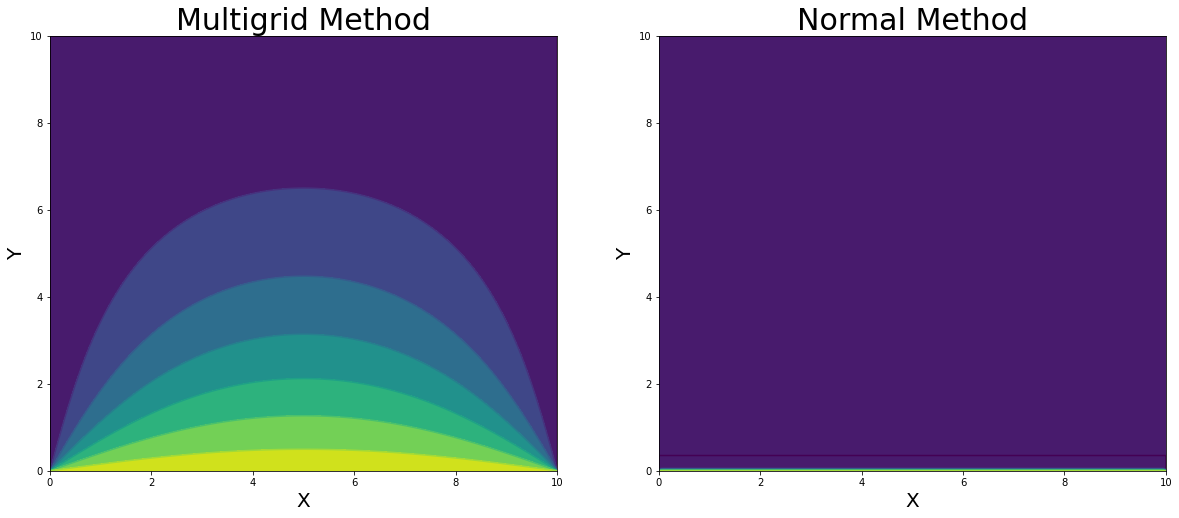

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def create_V(n):
    num = 2**(n) + 1
    V = np.zeros((num,num))
    V[0,:] = 100
    return V

def iterate_V(V, delta, step):
    num = len(V)
    count = 0
    while True:
        Vi = np.array(V)
        V[step:num-step:step,step:num-step:step] = 0.25*(V[step:num-step:step, 0:num-2*step:step]+V[step:num-step:step, 2*step:num:step]+V[0:num-2*step:step, step:num-step:step]+V[2*step:num:step, step:num-step:step])
        Vf = np.array(V)
        count += 1
        if converge_V(Vi, Vf) < delta:
            break
    return V, count

def update_V(V, n, delta):
    num = 2**n + 1
    for i in range(n):
        step = 2**(n-i-1)
        V[step:num-step:2*step, step:num-step:2*step] = 0.25*(V[0:num-2*step:2*step, 0:num-2*step:2*step] + V[0:num-2*step:2*step, 2*step:num:2*step] + V[2*step:num:2*step, 2*step:num:2*step] + V[2*step:num:2*step, 0:num-2*step:2*step])
        V[2*step:num-2*step:2*step, step:num-step:2*step] = 0.5*(V[2*step:num-2*step:2*step, 0:num-2*step:2*step] + V[2*step:num-2*step:2*step, 2*step:num:2*step])
        V[step:num-step:2*step, 2*step:num-2*step:2*step] = 0.5*(V[0:num-2*step:2*step, 2*step:num-2*step:2*step] + V[2*step:num:2*step, 2*step:num-2*step:2*step])
        V, count = iterate_V(V, delta, step)
        print(count)
    return V

def plot_V(V, V_normal):
    num = len(V)
    fig, ax = plt.subplots(figsize = (20,8), ncols=2)
    x = np.linspace(0,10,num)
    y = np.linspace(0,10,num)
    X, Y = np.meshgrid(x,y)
    ax[0].contour(X,Y,V)
    ax[0].contourf(X,Y,V)
    ax[0].set_xlabel('X', fontsize = 20)
    ax[0].set_ylabel('Y', fontsize = 20)
    ax[0].set_title('Multigrid Method', fontsize = 30)
    ax[1].contour(X,Y,V_normal)
    ax[1].contourf(X,Y,V_normal)
    ax[1].set_xlabel('X', fontsize = 20)
    ax[1].set_ylabel('Y', fontsize = 20)
    ax[1].set_title('Normal Method', fontsize = 30)

def converge_V(Vi, Vf):
    delta = abs(Vf-Vi).sum()/Vi.sum()
    return delta

def normal_iterate(V, N = 35):
    num = len(V)
    for i in range(N):
        V[1:num-1, 1:num-1] = 0.25*(V[2:num, 1:num-1]+V[0:num-2, 1:num-1]+V[1:num-1, 2:num]+V[1:num-1, 0:num-2])
    return V
n = 10
delta = 0.0001
V = create_V(n)
V_normal = create_V(n)
V = update_V(V, n, delta)
V_normal = normal_iterate(V_normal)
plot_V(V, V_normal)

plt.savefig('P3.pdf')

## Tasks: Arbitrary boundary shapes

Consider a circle with radius $r=1$. Set the potential on the circle to be $V_0$ and put a point charge at the center. Using the generalization to the arbitrary boundary shapes to find the potential inside the circle. 

In [27]:
for n in range(11):
    %timeit update_V(V, n, N)

239 ns ± 7.44 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
852 ms ± 2.33 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
998 ms ± 64.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.03 s ± 16.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.06 s ± 6.77 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.06 s ± 11.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.06 s ± 2.91 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.07 s ± 1.88 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.06 s ± 9.84 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.07 s ± 19.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.07 s ± 8.17 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


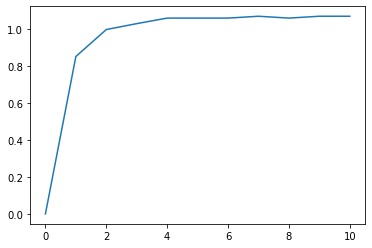

In [32]:
plt.plot(np.array([0.239,852,998,1030,1060,1060,1060,1070,1060,1070,1070])/1000)

## Tasks: Arbitrary boundary shapes

Consider a circle with radius $r=1$. Set the potential on the circle to be $V_0$ and put a point charge at the center. Using the generalization to the arbitrary boundary shapes to find the potential inside the circle. 

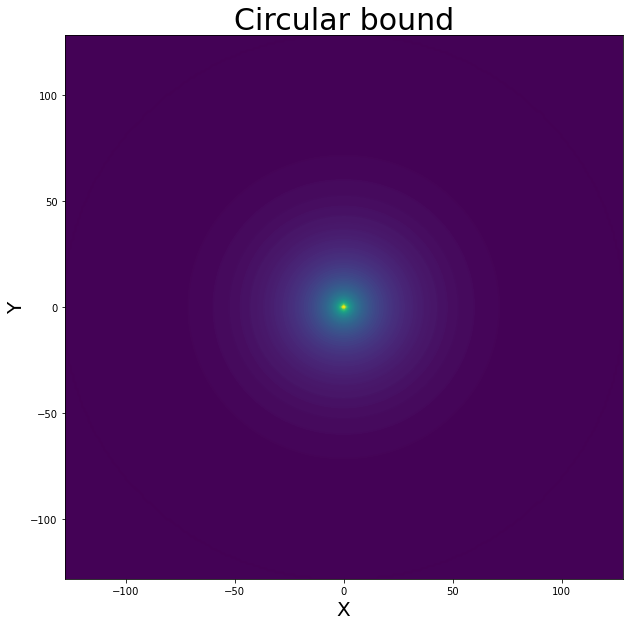

In [51]:
import numpy as np
import matplotlib.pyplot as plt

def ratio_of_h(i, j, R):
    return np.sqrt((R+i)*(R-i)) - j

def distance(i, j, R):
    return np.sqrt(i**2+j**2)-R

def coefficient(a, b, c, d):
    return a*b*c*d/(a*b+c*d)

def frac(a, b):
    return 1/(a*(a+b))

def create_V(R):
    num = 2*R + 1
    V = np.zeros((num,num))
    x = np.linspace(-R,R,num)
    i, j=np.meshgrid(x, x, indexing = 'ij')
    d = distance(i, j, R)
    filter = d < 0
    V[~filter] = 0
    filter[R,R] = False
    V[R,R] = 100
    return V, filter

def create_ratio(R):
    num = 2*R+1
    x = np.linspace(-R,R,num)
    i, j=np.meshgrid(x, x, indexing = 'ij')
    up_ratio = ratio_of_h(i, j, R)
    bigger = 0 < up_ratio
    smaller = up_ratio < 1
    filter = bigger & smaller
    filter = ~ filter
    up_ratio[filter] = 1
    down_ratio = np.flip(up_ratio, 1)
    right_ratio = up_ratio.T
    left_ratio = down_ratio.T
    return up_ratio, down_ratio, right_ratio, left_ratio

def iterate_V(N, V, filter, up_ratio, down_ratio, right_ratio, left_ratio):
    
    for i in range(N):
        r = coefficient(up_ratio, down_ratio, right_ratio, left_ratio)
        up = frac(up_ratio, down_ratio)
        down = frac(down_ratio, up_ratio)
        right = frac(right_ratio, left_ratio)
        left = frac(left_ratio, right_ratio)
        V[filter] = r[filter]*(up[filter]*V[np.roll(filter,1,axis=1)] + down[filter]*V[np.roll(filter,-1,axis=1)]\
                    + right[filter]*V[np.roll(filter,1,axis=0)] + left[filter]*V[np.roll(filter,-1,axis=0)])
    return V

def plot_V(V):
    num = 2*R+1
    x = np.linspace(-R,R,num)
    fig, ax = plt.subplots(figsize = (10,10))  
    ax.contour(x,x,V,levels=100)
    ax.contourf(x,x,V,levels=100)
    ax.set_xlabel('X', fontsize = 20)
    ax.set_ylabel('Y', fontsize = 20)
    ax.set_title('Circular bound', fontsize = 30)

R = 2**7
N = 3260
V2 = iterate_V(N, *create_V(R), *create_ratio(R)) 
plot_V(V2)
plt.savefig('P4.pdf')

In [58]:
A = np.array([[2,2,2],[2,2,2]])

In [61]:
A.shape
B = np.full(A.shape, False)
B

array([[False, False, False],
       [False, False, False]])

1 ,
13 ,
54 ,
176 ,
517 ,
1262 ,
794 ,
443 ,


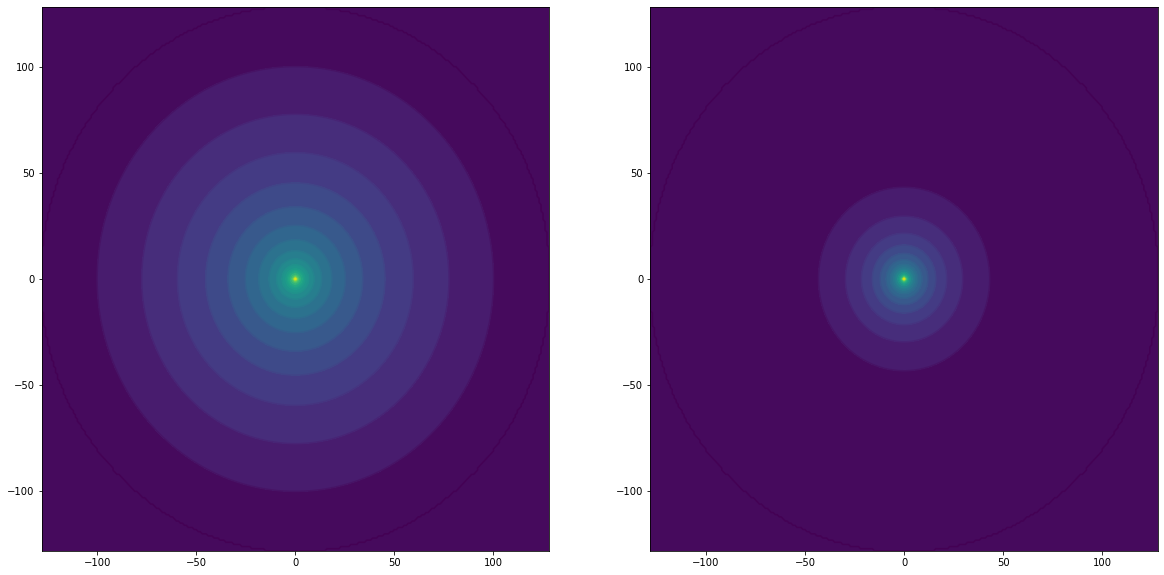

In [52]:
import numpy as np
import matplotlib.pyplot as plt

def ratio_of_h(i, j, R):
    return np.sqrt((R+i)*(R-i)) - j

def distance(i, j, R):
    return np.sqrt(i**2+j**2)-R

def coefficient(a, b, c, d):
    return a*b*c*d/(a*b+c*d)

def frac(a, b):
    return 1/(a*(a+b))

def create_V(num):
    R = (num - 1)//2
    V = np.zeros((num,num))
    ax = np.linspace(-R,R,num)
    i, j=np.meshgrid(ax, ax, indexing = 'ij')
    d = distance(i, j, R)
    Inside_Circle = d < 0
    Inside_Circle[R,R] = False
    V[~Inside_Circle] = 0
    V[R,R] = 100
    return V, Inside_Circle

def corners_update(V, num, step, Inside_Circle):
    Corners_Grid = np.full(V.shape, False)
    Corners_Grid[step:num-step:2*step, step:num-step:2*step] = True
    Corners_Grid = Corners_Grid & Inside_Circle
    up_right = np.roll(Corners_Grid, step, axis = 0)
    up_right = np.roll(up_right, step, axis = 1)
    up_left = np.roll(up_right, -2*step, axis = 0)
    down_left = np.roll(up_left, -2*step, axis = 1)
    down_right = np.roll(down_left, 2*step, axis = 0)
    V[Corners_Grid] = 0.25*(V[up_right] + V[up_left] + V[down_left] + V[down_right])
    return V

def up_down_update(V, num, step, Inside_Circle):
    Up_Down_Grid = np.full(V.shape, False)
    Up_Down_Grid[2*step:num-2*step:2*step, step:num-step:2*step] = True
    Up_Down_Grid = Up_Down_Grid & Inside_Circle
    up = np.roll(Up_Down_Grid, step, axis = 1)
    down = np.roll(Up_Down_Grid, -step, axis = 1)
    V[Up_Down_Grid] = 0.5*(V[up] + V[down])
    return V

def right_left_update(V, num, step, Inside_Circle):
    Right_Left_Grid = np.full(V.shape, False)
    Right_Left_Grid[step:num-step:2*step, 2*step:num-2*step:2*step] = True
    Right_Left_Grid = Right_Left_Grid & Inside_Circle
    right = np.roll(Right_Left_Grid, step, axis = 0)
    left = np.roll(Right_Left_Grid, -step, axis = 0)
    V[Right_Left_Grid] = 0.5*(V[right] + V[left])
    return V

def neighbors_iterate(V, num, step, Inside_Circle):
    up_ratio, down_ratio, right_ratio, left_ratio = create_ratio(num)
    r = coefficient(up_ratio, down_ratio, right_ratio, left_ratio)
    up = frac(up_ratio, down_ratio)
    down = frac(down_ratio, up_ratio)
    right = frac(right_ratio, left_ratio)
    left = frac(left_ratio, right_ratio)
    Active_Grid = np.full(V.shape, False)
    Active_Grid[step:num-step:step, step:num-step:step] = True
    Active_Grid = Active_Grid & Inside_Circle
    up_V = np.roll(Active_Grid, step, axis = 1)
    down_V = np.roll(Active_Grid, -step, axis = 1)
    right_V = np.roll(Active_Grid, step, axis = 0)
    left_V = np.roll(Active_Grid, -step, axis = 0)
    V[Active_Grid] = r[Active_Grid]*(up[Active_Grid]*V[up_V] + down[Active_Grid]*V[down_V]\
                    + right[Active_Grid]*V[right_V] + left[Active_Grid]*V[left_V])
    return V, Active_Grid

def update_V1(n, delta):
    num = 2**n + 1
    V, Inside_Circle = create_V(num)
    for i in range(n):
        step = 2**(n-i-1)
        V = corners_update(V, num, step, Inside_Circle)
        V = up_down_update(V, num, step, Inside_Circle)
        V = right_left_update(V, num, step, Inside_Circle)
        V, count = iterate_V1(V, num, step, Inside_Circle, delta)
        print(count,',')
    return V

def update_V2(n, delta):
    num = 2**n + 1
    V, Inside_Circle = create_V(num)
    for i in range(n):
        step = 2**(n-i-1)
        V = corners_update(V, num, step, Inside_Circle)
        V = up_down_update(V, num, step, Inside_Circle)
        V = right_left_update(V, num, step, Inside_Circle)
        V, count = iterate_V2(V, num, step, Inside_Circle, delta)
        print(count,',')
    return V

def create_ratio(num):
    R = (num - 1)//2
    x = np.linspace(-R,R,num)
    i, j=np.meshgrid(x, x, indexing = 'ij')
    up_ratio = ratio_of_h(i, j, R)
    bigger = 0 < up_ratio
    smaller = up_ratio < 1
    filter = bigger & smaller
    filter = ~ filter
    up_ratio[filter] = 1
    down_ratio = np.flip(up_ratio, 1)
    right_ratio = up_ratio.T
    left_ratio = down_ratio.T
    return up_ratio, down_ratio, right_ratio, left_ratio

def converge_V(Vi, Vf, Active_Grid, delta):
    check_converge_for_no_zero = np.full(Vi.shape, False)
    check_converge_for_zero = np.full(Vi.shape, False)
    Vi_zero = Vi == 0
    Vf_zero = Vf == 0
    zero = Vi_zero|Vf_zero
    no_zero = ~zero
    check_converge_for_no_zero[no_zero] = abs(Vi[no_zero]-Vf[no_zero])/abs(Vi[no_zero]) <= delta
    check_converge_for_zero[zero] = Vi_zero[zero] & Vf_zero[zero]
    check_converge = check_converge_for_zero | check_converge_for_no_zero
    converge = check_converge[Active_Grid].all()
    no_converge = ~check_converge
    return converge, no_converge

def iterate_V1(V, num, step, Inside_Circle, delta):
    count = 0
    no_converge = np.full(V.shape, True)
    while True:
        count += 1
        Vi = np.array(V)
        V, Active_Grid = neighbors_iterate(V, num, step, Inside_Circle)
        Vf = np.array(V)
        converge, no_converge = converge_V(Vi, Vf, Active_Grid, delta)
        if converge == True:
            break
    return V, count

def iterate_V2(V, num, step, Inside_Circle, delta):
    count = 0
    no_converge = np.full(V.shape, True)
    while True:
        count += 1
        Vi = np.array(V)
        V, Active_Grid = neighbors_iterate(V, num, step, Inside_Circle & no_converge)
        Vf = np.array(V)
        converge, no_converge = converge_V(Vi, Vf, Active_Grid, delta)
        if converge == True:
            break
    return V, count

def plot_V(V1, V2):
    num = len(V1)
    R = (num - 1)//2
    x = np.linspace(-R,R,num)
    fig, ax = plt.subplots(figsize = (20,10), ncols = 2)  
    ax[0].contour(x,x,V1, levels = 20)
    ax[0].contourf(x,x,V1, levels = 20)
    ax[1].contour(x,x,V2, levels = 20)
    ax[1].contourf(x,x,V2, levels = 20)
    plt.savefig('dipole_in_circular_potential_3')

n = 8
delta = 0.0001
V1 = update_V1(n, delta)
#V2 = update_V2(n, delta)
plot_V(V1, V2)


3260


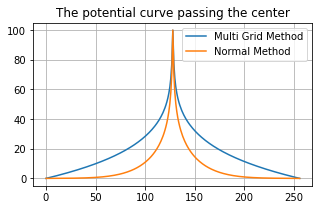

In [61]:
print(sum([1 ,
13 ,
54 ,
176 ,
517 ,
1262 ,
794 ,
443 ,]))

fig, ax = plt.subplots(figsize = (5,3))  
ax.plot(V1[R,:], label = 'Multi Grid Method')
ax.plot(V2[R,:], label = 'Normal Method')
ax.legend()
ax.grid()
ax.set_title('The potential curve passing the center')
plt.savefig('P6.pdf')

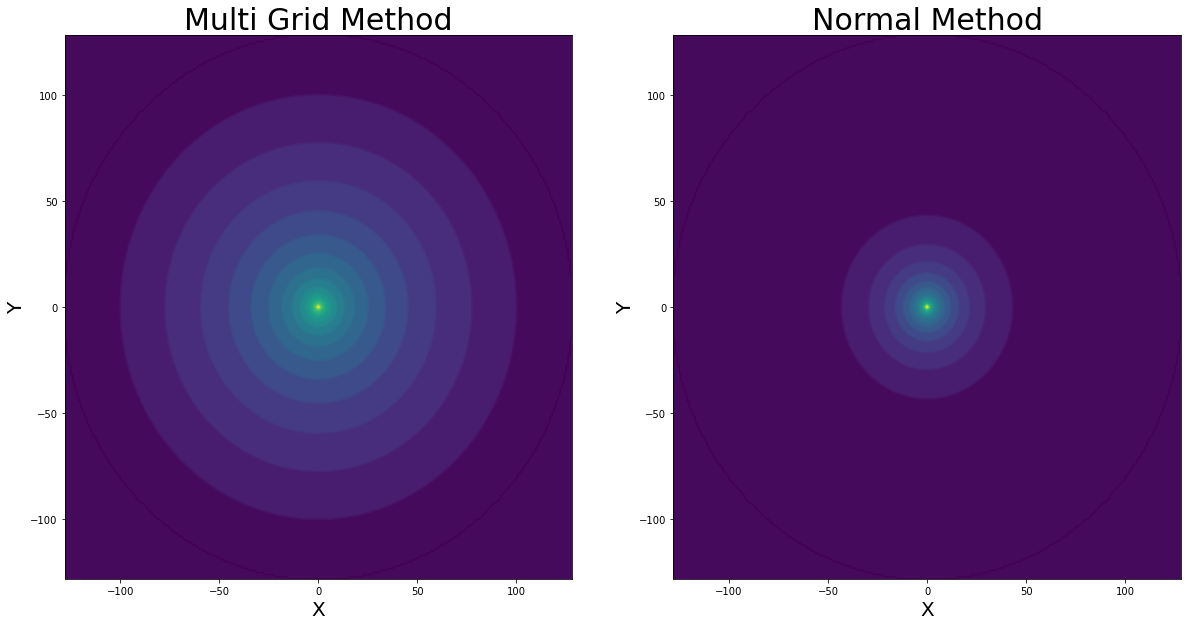

In [60]:
def plot_V(V1, V2):
    num = len(V1)
    R = (num - 1)//2
    x = np.linspace(-R,R,num)
    fig, ax = plt.subplots(figsize = (20,10), ncols = 2)  
    ax[0].contour(x,x,V1, levels = 20)
    ax[0].contourf(x,x,V1, levels = 20)
    ax[0].set_xlabel('X', fontsize = 20)
    ax[0].set_ylabel('Y', fontsize = 20)
    ax[0].set_title('Multi Grid Method', fontsize = 30)
    ax[1].contour(x,x,V2, levels = 20)
    ax[1].contourf(x,x,V2, levels = 20)
    ax[1].set_xlabel('X', fontsize = 20)
    ax[1].set_ylabel('Y', fontsize = 20)
    ax[1].set_title('Normal Method', fontsize = 30)

plot_V(V1, V2)
plt.savefig('P5.pdf')

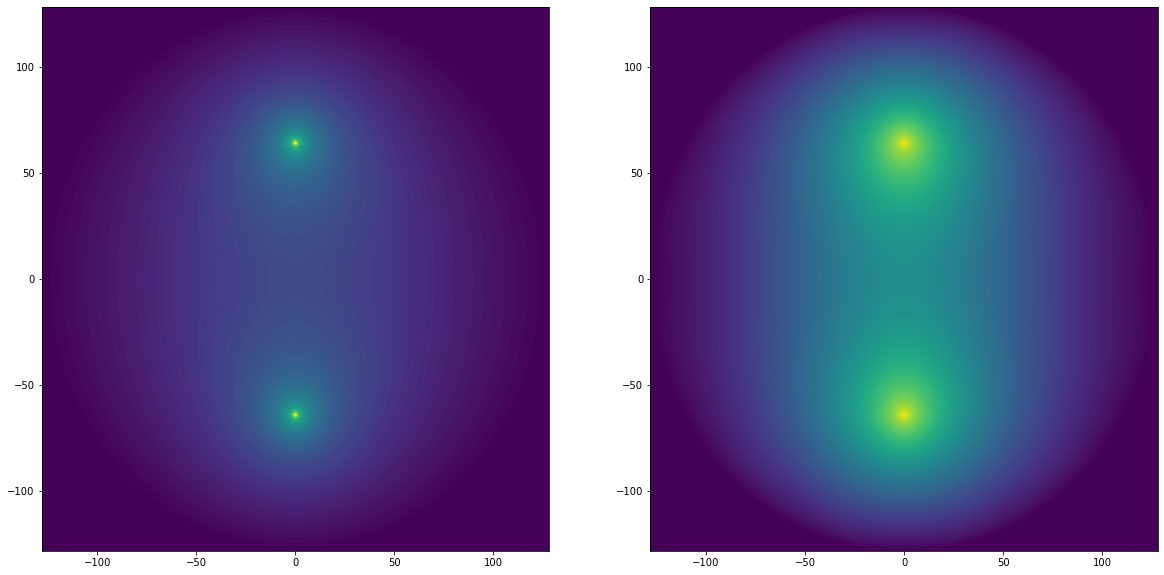

In [5]:
def plot_V(V1, V2):
    num = len(V1)
    R = (num - 1)//2
    x = np.linspace(-R,R,num)
    fig, ax = plt.subplots(figsize = (20,10), ncols = 2)  
    ax[0].contour(x,x,V1, levels = 100)
    ax[0].contourf(x,x,V1, levels = 100)
    ax[1].contour(x,x,V2, levels = 100)
    ax[1].contourf(x,x,V2, levels = 100)
    plt.savefig('charge_in_circular_potential')

plot_V(V1, V2)

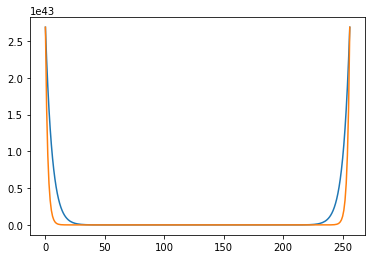

In [24]:
a = plt.plot(np.exp(V1[:,len(V1)//2]))
b = plt.plot(np.exp(V2[:,len(V2)//2]))